In [1]:
import torch
from torch.autograd import Variable

In [2]:
N, D_in, H, D_out = 64, 1000, 100, 10
x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

In [8]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

In [9]:
loss_fn = torch.nn.MSELoss(size_average=False)
learning_rate = 1e-4

In [10]:
losses = []
for t in range(500):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])
    losses.append(loss.data[0])
    model.zero_grad()
    loss.backward()
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 657.8223876953125
1 609.7667846679688
2 568.0597534179688
3 531.3983154296875
4 499.0675354003906
5 469.93475341796875
6 443.2994384765625
7 419.0072021484375
8 396.616455078125
9 375.776123046875
10 356.3168029785156
11 338.161376953125
12 321.1225280761719
13 304.97076416015625
14 289.74188232421875
15 275.2341613769531
16 261.3598327636719
17 248.08258056640625
18 235.41590881347656
19 223.2892608642578
20 211.70559692382812
21 200.67623901367188
22 190.12594604492188
23 180.05987548828125
24 170.49624633789062
25 161.3853302001953
26 152.70437622070312
27 144.37098693847656
28 136.47413635253906
29 128.97048950195312
30 121.85065460205078
31 115.09768676757812
32 108.68675231933594
33 102.61380004882812
34 96.8638916015625
35 91.4207763671875
36 86.24869537353516
37 81.34262084960938
38 76.71150970458984
39 72.33109283447266
40 68.19525146484375
41 64.2857894897461
42 60.601959228515625
43 57.127349853515625
44 53.834014892578125
45 50.72809982299805
46 47.80232238769531
47 45.04

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

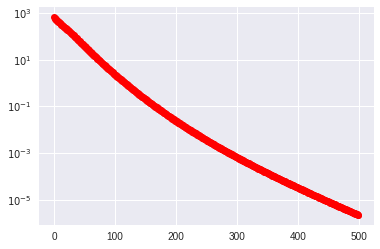

In [14]:
plt.plot(losses, "ro--")
plt.yscale("log")